In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AMIT/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.duplicated().sum()

1081

In [ ]:
data = data.drop_duplicates()


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.duplicated().sum()

0

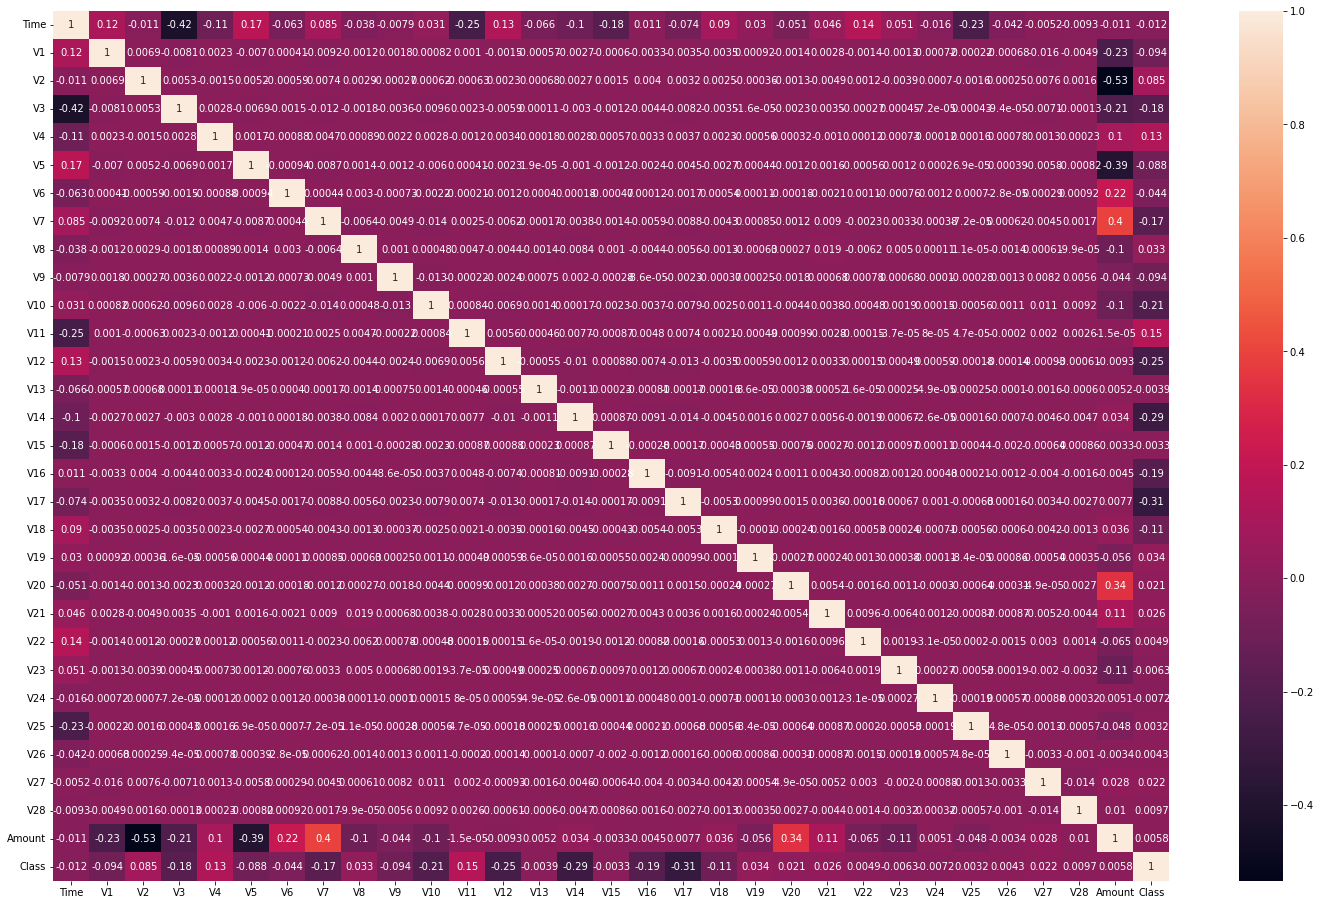

In [ ]:
plt.figure(figsize = (25,16))

sns.heatmap(data.corr(), annot = True) 

#As we saw from the data, there is a huge imbalance, we will try our model with this imbalance because fraud isn't a common case and see if our model can find out the difference, then we will try using over sampling and see if it gets better

#Extracting features and splitting

In [ ]:
#Extracting features
x = data.drop('Class', axis = 1)
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(x_train, y_train)

y_pred_log =  log_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print(f'Recall score: {recall*100}')
print(f'Precision score: {precision*100}')
print(f'F1 score: {f1*100}')

#The good thing is that there is a kind of balance between precision, recall and f1 score, but the bad news is that they have very low scores . We need a good score ebcause this is a sensitive data.

Recall score: 64.70588235294117
Precision score: 61.111111111111114
F1 score: 62.85714285714287


In [ ]:
y_pred_proba_log = log_model.predict_proba(x_test)[:,1]

Text(0.5, 1.0, 'AUC score for logistic regression')

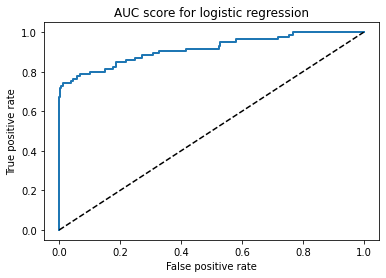

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log)

plt.figure(figsize = (6,4))

plt.plot(fpr, tpr, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.title('AUC score for logistic regression')

In [ ]:
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test, y_pred_proba_log)

print('AUC Score: ', log_auc*100)

AUC Score:  91.48952957579496


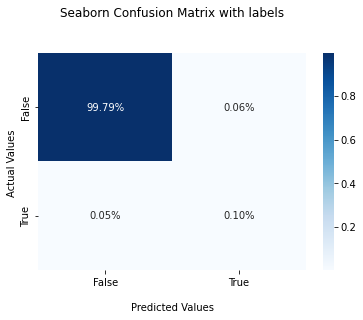

In [ ]:
from sklearn.metrics import confusion_matrix

log_mat = confusion_matrix(y_test, y_pred_log)

ax = sns.heatmap(log_mat/np.sum(log_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#Logistic regression scores weren't good enough, This data is considered sensitive, So we will focus on Recall score which is 64.7% in this model , the AUC score is 82.32, Let's try other models and see if it makes any difference

#Because we are dealing with a large dataset, KNN wouldn't be our best choice.Since KNN is a distance-based algorithm, the cost of calculating distance between a new point and each existing point is very high which in turn degrades the performance of the algorithm. The same thing goes for SVM

#**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print(f'Recall score: {recall*100}')
print(f'Precision score: {precision*100}')
print(f'F1 score: {f1*100}')

#As we can see, The scores aren't as good as you may have thought. That is because naive bayes makes each feature independant of the other, but in this dataset, this doesn't seem to be true
#From the corrolation heatmap above, we can see some features are dependant on each other

Recall score: 61.1764705882353
Precision score: 13.164556962025317
F1 score: 21.666666666666668


In [ ]:
y_pred_proba_nb = nb_model.predict_proba(x_test)[:,1]

Text(0.5, 1.0, 'AUC score for logistic regression')

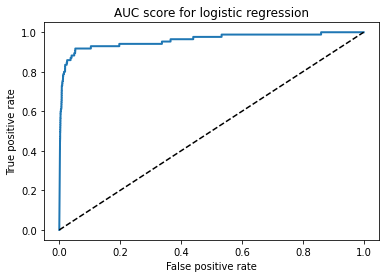

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nb)

plt.figure(figsize = (6,4))

plt.plot(fpr, tpr, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.title('AUC score for logistic regression')

In [ ]:
from sklearn.metrics import roc_auc_score

nb_auc = roc_auc_score(y_test, y_pred_proba_nb)

print('AUC Score: ', nb_auc*100)

AUC Score:  95.97653536979995


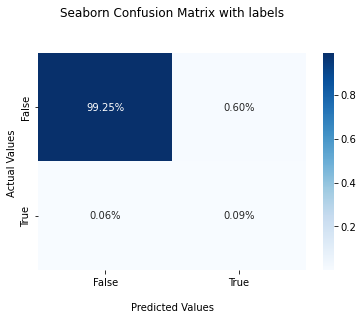

In [ ]:
from sklearn.metrics import confusion_matrix

log_mat = confusion_matrix(y_test, y_pred_nb)

ax = sns.heatmap(log_mat/np.sum(log_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#We can conclude that Naive bayes is also not hte best choice for this kind of data with a recall score of 61% and AUC score of 96%

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state = 2)

tree_model.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

print(f'Recall score: {recall*100}')
print(f'Precision score: {precision*100}')
print(f'F1 score: {f1*100}')

#We have a slightly better score here, Which is 70.6 recall score

Recall score: 70.58823529411765
Precision score: 70.58823529411765
F1 score: 70.58823529411765


In [ ]:
y_pred_proba_tree = tree_model.predict_proba(x_test)[:,1]

Text(0.5, 1.0, 'AUC score for logistic regression')

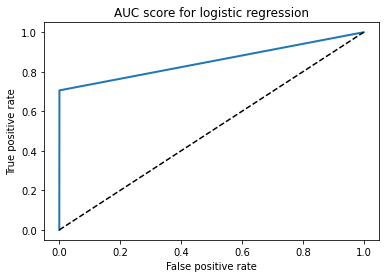

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tree)

plt.figure(figsize = (6,4))

plt.plot(fpr, tpr, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.title('AUC score for logistic regression')

In [ ]:
from sklearn.metrics import roc_auc_score

nb_auc = roc_auc_score(y_test, y_pred_proba_tree)

print('AUC Score: ', nb_auc*100)

AUC Score:  85.27205661742646


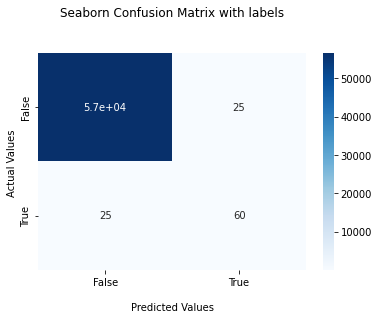

In [ ]:
from sklearn.metrics import confusion_matrix

tree_mat = confusion_matrix(y_test, y_pred_tree)

ax = sns.heatmap(tree_mat, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#The recall score is getting slightly better, but as we deal with a large dataset, things must be more complex so lets try to make it more complex by using random forests classification

#Random forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 3, n_estimators= 200, min_samples_split=3)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

#Here we tried hypertuning in our model and these values had the best scores

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f'Recall score: {recall*100}')
print(f'Precision score: {precision*100}')
print(f'F1 score: {f1*100}')

Recall score: 71.76470588235294
Precision score: 98.38709677419355
F1 score: 82.99319727891155


In [ ]:
y_pred_proba_rf = rf_model.predict_proba(x_test)[:,1]

Text(0.5, 1.0, 'AUC score for Random forest classification')

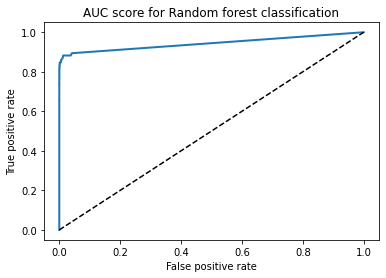

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize = (6,4))

plt.plot(fpr, tpr, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.title('AUC score for Random forest classification')

In [ ]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print('AUC Score: ', rf_auc*100)

AUC Score:  94.39818030245931


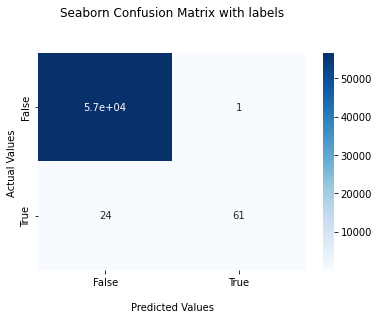

In [ ]:
from sklearn.metrics import confusion_matrix

rf_mat = confusion_matrix(y_test, y_pred_rf)

ax = sns.heatmap(rf_mat, annot=True,  cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#The Random forest has the best overall scores, more accuracy could be achieved if the data had more frauds, but when i tried oversampling and undersamping, the model got worse and confused because of this number of non fraud compared to fraud, In this model, we managed to achieve excellent precision score and a good recall score for this large imbalance, the overall AUC score was around 94.4%, the more complex the model gets, the more accuracy it can achieve, but also time taken in very very large, the grid search for example took more than 7 hours, the training could take 30 to 50 mins , But overall RFC has the bas scores

In [ ]:
# # Random forest classification has good scores, let's try to make it even better by using grid search
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' :[100,150,200],
#           'max_depth' :[100,20,50,None],
#           'min_samples_split' :[2,3,4,5]}

# grid = GridSearchCV(estimator = rf_model, param_grid = params, cv = 100)

# grid.fit(x_train, y_train)

# y_pred_grid = grid.predict(x_test)

# print(grid.best_params_)

#XGBoost

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# xgboost = GradientBoostingClassifier()

# xgboost.fit(x_train, y_train)

# y_pred_xg = xgboost.predict(x_test)

In [ ]:
# from sklearn.metrics import recall_score, precision_score, f1_score

# recall = recall_score(y_test, y_pred_xg)
# precision = precision_score(y_test, y_pred_xg)
# f1 = f1_score(y_test, y_pred_xg)

# print(f'Recall score: {recall*100}')
# print(f'Precision score: {precision*100}')
# print(f'F1 score: {f1*100}')

In [ ]:
# y_pred_proba_xg = xgboost.predict_proba(x_test)[:,1]

In [ ]:
# from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xg)

# plt.figure(figsize = (6,4))

# plt.plot(fpr, tpr, linewidth = 2)

# plt.plot([0,1], [0,1], 'k--')

# plt.xlabel('False positive rate')

# plt.ylabel('True positive rate')

# plt.title('AUC score for Random forest classification')

In [ ]:
# from sklearn.metrics import roc_auc_score

# xg_auc = roc_auc_score(y_test, y_pred_proba_xg)

# print('AUC Score: ', xg_auc*100)

#XGBoost tok a very very long time to execute, and the sores were so low, so its clear that this is not a good model for our dataset